<a href="https://colab.research.google.com/github/Anjan-AI/TSAI-EVA5/blob/master/Session%209%20-%20DATA%20AUGMENTATION/EVA5_Session_9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Added the modular files to the drive and added to path

In [1]:
!git clone https://github.com/Anjan-AI/TSAI-EVA5.git

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 267, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 462 (delta 82), reused 178 (delta 30), pack-reused 195
Receiving objects: 100% (462/462), 4.17 MiB | 1.14 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [2]:
import sys
sys.path.append('/content/TSAI-EVA5/Session 9 - DATA AUGMENTATION')

### Import all the Library

In [4]:
import torch
import os
import torchvision
import torchvision.transforms as transfroms
from Dataset.dataset import Dataset,cifar10_classes
from Dataset.image_augmentations import AlbumentationTransforms
from Utils.SetCuda import set_seed,initialize_cuda
from Utils.utilities import print_model_summary,cross_entropy_loss
from Utils.show_image import imshow ,show_train_data
from models.QuizDNN import QuizDNN
from Training.Training_Testing import train ,test,runmodel

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [5]:
classes = cifar10_classes()
#define the transformation 
train_transform = AlbumentationTransforms(augmentation = True, mean=(0.4914, 0.4822, 0.4465) ,std_dev =(0.2471, 0.2435, 0.2616),horizontal_flip_prob=0.6,vertical_flip_prob=0.6,rotate_degree =30.0,cutout= True)
test_transform = AlbumentationTransforms(augmentation = True, mean=(0.4914, 0.4822, 0.4465) ,std_dev =(0.2471, 0.2435, 0.2616))
# allocate the transfroamtions to the the Data class
Data = Dataset(train_transform, test_transform)
# downlaod the data
train_set = Data.download_cifar10dataset(train = True)
test_set = Data.download_cifar10dataset(train = False)

#check for the GUP avaliblbity and manual seeding
seed =1
cuda,device = initialize_cuda(seed)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
GPU Available? True


In [6]:
# Load the test and train data , set the batch size & Num_workeres.
train_loader = Data.data_loader(train_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )
test_loader = Data.data_loader(test_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

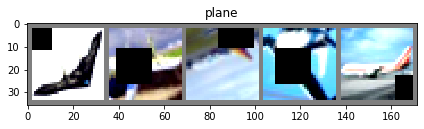

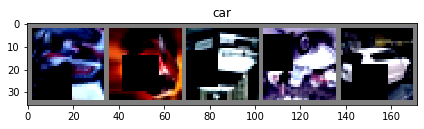

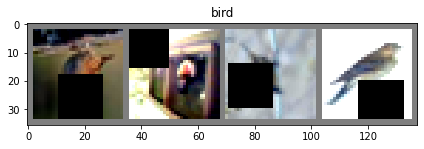

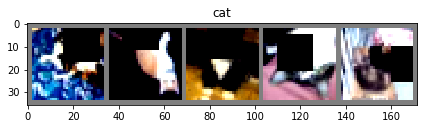

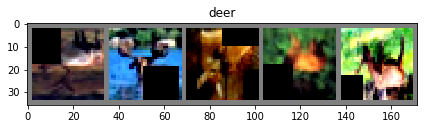

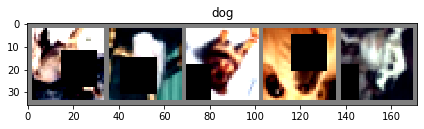

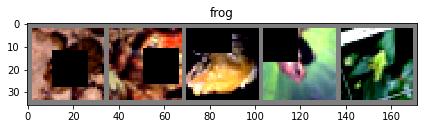

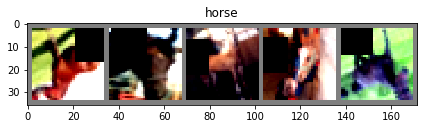

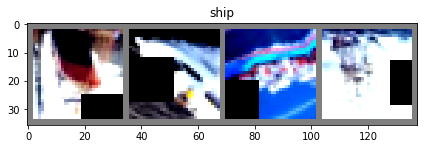

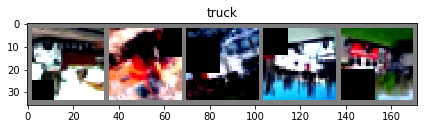

In [7]:
show_train_data(train_loader, classes)

In [8]:
# laod the model and print the summary
model = QuizDNN()
print_model_summary(model, input_size = (3,32,32),device =device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1

In [9]:
EPOCHS = 25 # set the no of epcohs

criterion = cross_entropy_loss()  # Create loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #define optimzer
scheduler = StepLR(optimizer, step_size=40, gamma=0.1) # define scheduler
train_losses = []
test_losses = []
train_acc = []
test_acc = []
print(device)
model = model.to(device)
runmodel(model,device,train_loader,test_loader,optimizer,scheduler,EPOCHS,criterion, train_losses,train_acc,test_losses,test_acc)



  0%|          | 0/782 [00:00<?, ?it/s]

cuda
EPOCH: 0


Loss=1.3112350702285767 Batch_id=781 Accuracy=40.53: 100%|██████████| 782/782 [00:28<00:00, 27.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 4800/10000 (48.00%)

EPOCH: 1


Loss=1.236579418182373 Batch_id=781 Accuracy=51.92: 100%|██████████| 782/782 [00:28<00:00, 27.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 5814/10000 (58.14%)

EPOCH: 2


Loss=0.8736971020698547 Batch_id=781 Accuracy=57.06: 100%|██████████| 782/782 [00:28<00:00, 27.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 6066/10000 (60.66%)

EPOCH: 3


Loss=1.1438759565353394 Batch_id=781 Accuracy=60.70: 100%|██████████| 782/782 [00:27<00:00, 27.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 6432/10000 (64.32%)

EPOCH: 4


Loss=0.8614801168441772 Batch_id=781 Accuracy=62.93: 100%|██████████| 782/782 [00:27<00:00, 28.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0142, Accuracy: 6797/10000 (67.97%)

EPOCH: 5


Loss=0.8048669099807739 Batch_id=781 Accuracy=64.97: 100%|██████████| 782/782 [00:27<00:00, 28.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 6866/10000 (68.66%)

EPOCH: 6


Loss=1.1667444705963135 Batch_id=781 Accuracy=66.75: 100%|██████████| 782/782 [00:27<00:00, 28.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 6941/10000 (69.41%)

EPOCH: 7


Loss=0.821753203868866 Batch_id=781 Accuracy=68.09: 100%|██████████| 782/782 [00:27<00:00, 28.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 7277/10000 (72.77%)

EPOCH: 8


Loss=1.2232497930526733 Batch_id=781 Accuracy=69.27: 100%|██████████| 782/782 [00:27<00:00, 28.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 7323/10000 (73.23%)

EPOCH: 9


Loss=0.8048624992370605 Batch_id=781 Accuracy=70.03: 100%|██████████| 782/782 [00:27<00:00, 28.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 7434/10000 (74.34%)

EPOCH: 10


Loss=0.46951544284820557 Batch_id=781 Accuracy=70.94: 100%|██████████| 782/782 [00:27<00:00, 28.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7580/10000 (75.80%)

EPOCH: 11


Loss=0.6721704602241516 Batch_id=273 Accuracy=71.21:  35%|███▌      | 274/782 [00:09<00:17, 29.87it/s]

KeyboardInterrupt: ignored